# Python<img src='https://developers.redhat.com/sites/default/files/styles/article_feature/public/blog/2014/09/python-logo.png?itok=NNQ6xBcf' align='after' width=180> for <img align='after' width='180' src='https://drive.google.com/uc?export=view&id=19qZe5VIxkIEm7_hYkrvlH142XPBxBaEf'> 
 # Data manipulations for a possible resolution of the team assignment


---
> This notebook processes the data from the excel sheet from [canvas](https://canvas.uva.nl/courses/25016/files/folder/Tutorials/Data) in order to obtain the information that you may need to solve the team Assignment 1. Feel free to make a copy of this notebook and add the code of your resolution to it. 
---

In [129]:
import sys
if 'google.colab' in sys.modules:
    import os
    from google.colab import files
    # just check if we already uploaded, may we restart the runtime and run all cells
    if not os.path.isfile('Data Set Feedcalculator.xlsx'):
        uploaded = files.upload()

# Read the data, as you have already seen [here]( https://colab.research.google.com/drive/1Q3fNgpa8QfGTzJ7lj-oZ8Ya0IIGCdnEr).

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import shutil
!pip install pyomo
from pyomo.environ import *
data = pd.read_excel('Data Set Feedcalculator.xlsx',sheet_name=None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
at_colab = "google.colab" in sys.modules
if at_colab:
    if not shutil.which('/usr/bin/glpsol'):
        !sudo apt install libglpk-dev python3.8-dev libgmp3-dev
        !apt-get install -y -qq glpk-utils
        assert(shutil.which('/usr/bin/glpsol'))

In [132]:
ingredients      = data['Ingredient Database']
nutrient_rules   = data['Nutrient Rules']
ingredient_rules = data['Ingredient Rules']

# Collect the ingredients that are available together with the relevant columns

In [133]:
available_ingredients = ingredients[ingredients.Availability][['Name','Reference name','Price']+list(nutrient_rules.Nutrient)].set_index('Reference name')
available_ingredients

,Name,Price,oebr,cp,cfibre,staew,ca,na,opp,dlysp,dmetp,dmcp,dthrp,dtryp,dvalp,dargp
Reference name,,,,,,,,,,,,,,,,
barley,Barley,0.26,2656.5,99.7,43.4,539.3,0.4,0.1,1.2,2.3,1.3,2.9,2.3,0.9,3.6,3.9
blood,Blood meal 80% CP,0.71,2450.0,800.0,10.0,0.0,0.5,5.8,1.3,51.3,6.9,13.8,25.4,8.7,49.6,24.8
boneash,Bone ash,0.18,0.0,0.0,0.0,0.0,289.3,9.5,82.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cotton,Cotton seed cake,0.20,1730.0,362.9,169.8,33.6,2.2,0.0,3.1,8.8,3.9,8.1,8.0,3.2,11.8,32.7
fish,Fish meal 56% CP,0.63,2862.0,563.0,0.0,0.0,60.0,10.5,19.6,38.5,14.3,18.8,20.1,5.6,32.3,30.6
fishlq,Fish meal 40% CP,0.55,0.0,384.0,0.0,0.0,141.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gnseeds,Groundnut seeds,0.59,5243.0,287.1,23.3,0.0,1.0,0.0,1.7,7.5,2.8,5.9,5.8,2.4,9.5,28.1
maize,Maize/ Corn,0.33,3227.8,76.3,20.8,648.5,0.1,0.0,0.7,1.4,1.4,2.7,2.1,0.4,2.9,3.1
maizebranhighq,"Maize bran, high quality",0.19,2893.4,90.6,39.6,489.3,1.3,0.2,1.4,1.8,1.6,3.1,2.4,0.5,3.8,3.9


# Collect the nutrient bounds

Note that 'not available' in a data frame is not the same as None!

In [134]:
nutrient_bounds = { nut : (lb if not pd.isna(lb) else 0,     # no lower bound translates into 0 as lower bound
                           ub if not pd.isna(ub) else None)  # no upper bound becomes None
                    for nut,lb,ub in zip(nutrient_rules.Nutrient,nutrient_rules['Lower Bound'],nutrient_rules['Upper Bound']) 
                  }

In [135]:
nutrient_bounds

{'oebr': (2750.0, 2850.0),
 'cp': (155.0, 195.0),
 'cfibre': (0, 75.0),
 'staew': (300.0, None),
 'ca': (7.0, 9.0),
 'na': (1.4, 2.1),
 'opp': (3.5, None),
 'dlysp': (6.7, 7.9),
 'dmetp': (2.8, None),
 'dmcp': (5.1, 6.1),
 'dthrp': (4.5, None),
 'dtryp': (1.3, None),
 'dvalp': (5.4, None),
 'dargp': (7.0, None)}

# Collect the ingredient bounds

Note again that 'not available' in a data frame is not the same as None!

In [136]:
ingredient_bounds = { ing : (lb if not pd.isna(lb) else 0,    # no lower bound translates into 0 as lower bound
                             ub if not pd.isna(ub) else None) # no upper bound becomes None
                      for ing,lb,ub in zip(ingredient_rules.Ingredient,ingredient_rules['Lower Bound'],ingredient_rules['Upper Bound']) }

In [137]:
ingredient_bounds

{'barley': (0, 0.1),
 'blood': (0, 0.03),
 'boneash': (0, 0.03),
 'mbmeal': (0, 0.05),
 'mbmeal2': (0, 0.08),
 'cotton': (0, 0.06),
 'copra': (0, 0.07),
 'fats': (0, 0.05),
 'fish': (0, 0.07),
 'fishlq': (0, 0.07),
 'maize': (0.2, None),
 'maizebranhighq': (0, 0.25),
 'maizebranlowq': (0, 0.15),
 'sugars': (0, 0.01),
 'rapecake': (0, 0.06),
 'rapemeal': (0, 0.06),
 'rice': (0, 0.15),
 'gnseeds': (0, 0.1),
 'gncake': (0, 0.08),
 'soybeanexp': (0, 0.07),
 'soybeanmeal': (0, 0.32),
 'soybeanmealhp': (0, 0.33),
 'soybeanheat': (0, 0.3),
 'sunflower': (0, 0.12),
 'sesamecake': (0, 0.12),
 'wheat': (0, 0.25),
 'wheatbran': (0, 0.08),
 'tapbran': (0, 0.2),
 'caswhole': (0, 0.25),
 'casfine': (0, 0.25),
 'cascoarse': (0, 0.15),
 'sunflowerseeds': (0, 0.12),
 'lime': (0, 0.02),
 'salt': (0, 0.003)}

# Collect the combined ingredient rules

This is slightly more complex, as we need to know where this data is placed in the sheet, hence the data frame. 
Note how we use `.dropna()` on series to leave only the values defined. 
Note as well how we filter the ingredients that are not available. 
It may happen that a combined rule disappears, because it did only relate to not available ingredients. 

If you want to know where the `Unnamed: ` columns are comming from, just examine the `ingredient_rules` data frame. 


In [138]:
combined_ingredient_rules   = [] 
set_of_availabe_ingredients = set(available_ingredients.index)
for c in ['Unnamed: '+str(i) for i in range(5,13)]:
    aux = ingredient_rules[[c]].dropna().values
    aux = [ v[0] for v in aux ]
    upperbound          = aux[0]
    ingredients_in_rule = set(aux[1:]).intersection(set_of_availabe_ingredients)
    if ingredients_in_rule:
        combined_ingredient_rules.append((upperbound,ingredients_in_rule))
combined_ingredient_rules

[(0.17, {'cotton', 'sunflower'}),
 (0.35, {'soybeanexp', 'soybeanmeal'}),
 (0.3, {'barley'}),
 (0.25, {'maizebranhighq', 'maizebranlowq'}),
 (0.07, {'fish', 'fishlq'}),
 (0.08, {'mbmeal'}),
 (0.25, {'casfine', 'caswhole', 'tapbran'})]

In [139]:
#Nutrient Upper bounds 
nutrients= nutrient_bounds.keys()
for nutrient in nutrients:
  print(nutrient_bounds[nutrient][1])
#None shows the nutrient does not have an upper bound

2850.0
195.0
75.0
None
9.0
2.1
None
7.9
None
6.1
None
None
None
None


In [140]:
#1.1 LINEAR MODEL 
#Linear Optimization Problem
def model1():
  #Type of Model
  model = ConcreteModel()
  
  #Sets
  model.nutrients = Set(initialize = nutrients)
  model.ingredient = Set(initialize = available_ingredients.index)
  
  #Variables
  model.ing=Var(model.ingredient, domain= NonNegativeReals) 

  #Objective Function
  model.minimize = Objective(expr = sum(available_ingredients.loc[x, 'Price'] * model.ing[x] \
                                        for x in model.ingredient), sense = minimize)
                                        

  #s.t : CONSTRAINTS
  #Total number of Ingredients 
  model.total_ing = Constraint(expr = sum(model.ing[x] for x in model.ingredient) == 1)

  #Ingredient Bounds
  #Upper Bounds
  model.ingredient_upper_bounds = ConstraintList()
  for x in model.ingredient:
    if x in ingredient_bounds.keys() and ingredient_bounds[x][1] != None:
      model.ingredient_upper_bounds.add(expr = model.ing[x] <= ingredient_bounds[x][1])
  #Lower bounds 
  model.ingredient_lower_bounds = ConstraintList()
  for x in model.ingredient:
    if x in ingredient_bounds.keys():
      model.ingredient_lower_bounds.add(expr = model.ing[x] >= ingredient_bounds[x][0])
  #Constraint of Nutrient Bounds
  #for upper bound rule
  def nutrient_upper_bounds_rules(model, nutrient):
    return sum(model.ing[x] * available_ingredients.loc[x, nutrient] for x in model.ingredient) <=nutrient_bounds[nutrient][1]
  model.nutrient_upper_bounds = Constraint(model.nutrients, rule = nutrient_upper_bounds_rules)

  #for lower bound rule 
  def nutrient_lower_bounds_rules(model, nutrient):
    return sum(model.ing[x] * available_ingredients.loc[x, nutrient] for x in model.ingredient) >= nutrient_bounds[nutrient][0]
  model.nutrient_lower_bounds = Constraint(model.nutrients, rule = nutrient_lower_bounds_rules)

  #Constraint for Combined Ingredient 
  model.combined_ingredient = ConstraintList()
  for i in combined_ingredient_rules:
    model.combined_ingredient.add(expr = sum(model.ing[j] for j in i[1])<=i[0])
  
  return model

#Choosing solver and finding Objective Value
soln = model1()
solution = SolverFactory('glpk').solve(soln)
print(soln.minimize())

#Solution
print("Solution is, " )
[ing() for ing in soln.ing.values()]


0.26976438938005975
Solution is, 


[0.0,
 0.0,
 0.0,
 0.0500000000000001,
 0.0141263227764206,
 0.0,
 0.0557509274538013,
 0.2,
 0.25,
 0.0,
 0.05,
 0.0,
 0.0683595445747817,
 0.0,
 0.12,
 0.0,
 0.0,
 0.186767558905476,
 0.0,
 0.0,
 0.00155506506872387,
 0.000733932080211385,
 0.0,
 0.000521583493105658,
 0.0,
 0.00218506564747916]

In [141]:
#1.2 Minimize the number of ingredients used 
#Linear Optimization Model
def model2():
  
  #Type of Model
  model = ConcreteModel()

  #Sets
  model.nutrients = Set(initialize = nutrients)
  model.ingredient = Set(initialize = available_ingredients.index)
  
  #Variables
  model.ing = Var(model.ingredient, domain = NonNegativeReals)
  model.ingbool = Var(model.ingredient, domain = Boolean)
  
  #Boolean for Variable
  model.boolvar = ConstraintList()
  for x in model.ingredient:
    model.boolvar.add(expr = model.ing[x] <= model.ingbool[x])
  
  #Objective Function
  model.minimize_ing = Objective( expr = sum(model.ingbool[x] for x in model.ingredient), sense = minimize)
  
  #CONSTRAINTS
  #Lower bound for ingredients
  model.ingredient_lower_bound = ConstraintList()
  for x in model.ingredient:
    if x in ingredient_bounds.keys():
      model.ingredient_lower_bound.add(expr = model.ing[x] >= ingredient_bounds[x][0])
  #Upper Bound for ingredients
  model.ingredient_upper_bound = ConstraintList()
  for x in model.ingredient:
    if x in ingredient_bounds.keys() and ingredient_bounds[x][1] != None:
      model.ingredient_upper_bound.add(expr = model.ing[x] <= ingredient_bounds[x][1])
  
  #Total Ingredients
  model.tot = Constraint(expr = sum(model.ing[x] for x in model.ingredient) == 1)
  
  #Nutrient Bounds
  #Lower Bound
  def nutrient_lower_bound_rule(model, nutrient):
    return sum(model.ing[x]*available_ingredients.loc[x, nutrient] for x in model.ingredient)>= nutrient_bounds[nutrient][0]
  model.nutrient_lower_bound = Constraint(model.nutrients, rule = nutrient_lower_bound_rule)
  #Upper Bound
  def nutrient_upper_bound_rule(model, nutrient):
    return sum(model.ing[x]*available_ingredients.loc[x, nutrient] for x in model.ingredient)<= nutrient_bounds[nutrient][1]
  model.nutrient_upper_bound = Constraint(model.nutrients, rule = nutrient_upper_bound_rule)

  #Constraint for Combined Ingredient 
  model.combined_ingredient = ConstraintList()
  for i in combined_ingredient_rules:
    model.combined_ingredient.add(expr = sum(model.ing[j] for j in i[1])<=i[0]) 
  
  return model

#Choosing solver and finding Objective Value
soln2 = model2()
solution2 = SolverFactory('glpk').solve(soln2)
print(int(soln2.minimize_ing()))

#Solution
print("Solution is, " )
[ing() for ing in soln2.ing.values()]


5
Solution is, 


[0.0,
 0.0,
 0.02758877366279,
 0.0,
 0.0,
 0.0,
 0.0,
 0.661116622533588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.307243908742422,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00121791119684511,
 0.0,
 0.0,
 0.0,
 0.00283278386435529]

In [142]:
#1.3  Minimum cost for the minimum number of ingredients
##Linear Optimization Model
def model3(ing_lim):
  
  #Type of Model
  model = ConcreteModel()

  #Sets
  model.nutrients = Set(initialize = nutrients)
  model.ingredient = Set(initialize = available_ingredients.index)

  #Variables
  model.ing = Var(model.ingredient, domain = NonNegativeReals)
  model.ingbool = Var(model.ingredient, domain = Boolean)

  #Boolean for Variable
  model.boolvar = ConstraintList()
  for x in model.ingredient:
    model.boolvar.add(expr = model.ing[x] <= model.ingbool[x])

  #Objective Function
  model.minimize_cost = Objective(expr = sum(available_ingredients.loc[x,'Price'] * model.ing[x] \
                    for x in model.ingredient), sense = minimize)
  
  #CONSTRAINTS
  #Lower bound for ingredients
  model.ingredient_lower_bound = ConstraintList()
  for x in model.ingredient:
    if x in ingredient_bounds.keys():
      model.ingredient_lower_bound.add(expr = model.ing[x] >= ingredient_bounds[x][0])

  #Upper Bound for ingredients
  model.ingredient_upper_bound = ConstraintList()
  for x in model.ingredient:
    if x in ingredient_bounds.keys() and ingredient_bounds[x][1] != None:
      model.ingredient_upper_bound.add(expr = model.ing[x] <= ingredient_bounds[x][1])
  
  #Total Ingredients
  model.ing_tot = Constraint(expr = sum(model.ing[x] for x in model.ingredient) == 1)
  model.bool_tot = Constraint(expr = sum(model.ingbool[x] for x in model.ingredient) <= ing_lim)
  
  #Nutrient Bounds
  #Lower Bound
  def nutrient_lower_bound_rule(model, nutrient):
    return sum(model.ing[x]*available_ingredients.loc[x, nutrient] for x in model.ingredient)>= nutrient_bounds[nutrient][0]
  model.nutrient_lower_bound = Constraint(model.nutrients, rule = nutrient_lower_bound_rule)
  #Upper Bound
  def nutrient_upper_bound_rule(model, nutrient):
    return sum(model.ing[x]*available_ingredients.loc[x, nutrient] for x in model.ingredient)<= nutrient_bounds[nutrient][1]
  model.nutrient_upper_bound = Constraint(model.nutrients, rule = nutrient_upper_bound_rule)

  #Constraint for Combined Ingredient 
  model.combined_ingredient = ConstraintList()
  for i in combined_ingredient_rules:
    model.combined_ingredient.add(expr = sum(model.ing[j] for j in i[1])<=i[0]) 
  
  return model

#Choosing solver and finding Objective Value
soln3 = model3(5)
solution3 = SolverFactory('glpk').solve(soln3)
print(soln3.minimize_cost())

#Solution
print("Solution is, " )
[ing() for ing in soln3.ing.values()]
#Floating point error seen here due to the precision used, a small round off error occurs which can't be mitigated in this case

0.3418228250878407
Solution is, 


[0.0,
 0.0,
 0.0281729353618562,
 0.0,
 0.0,
 0.0,
 0.0,
 0.717278040676024,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.250916772821743,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.89120579329468e-17,
 0.0,
 0.0,
 0.000632251140377015,
 0.0,
 0.0,
 0.0,
 0.003]

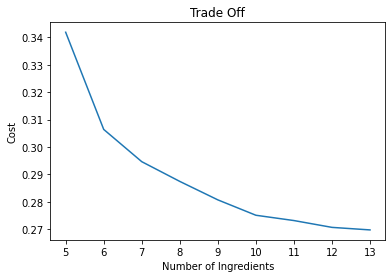

The cost should be 0.27511009020623334


In [143]:
#1.4 Navigating the Trade Off
#Minimal number of ingredients:5
#Optimal number of ingredients with minimal cost:13 
x=list(range(5,14))
y=[]
for i in x:
  a=model3(i)
  solution3=SolverFactory('glpk').solve(a)
  y.append(a.minimize_cost())


plt.plot(x,y)
plt.title("Trade Off")
plt.xlabel("Number of Ingredients")
plt.ylabel("Cost")
plt.show()

#Therefore after visualizing the graph we choose the elbow at 10 ingredients which would give a cost value of:
cost = np.interp(10, x,y)
print("The cost should be", cost)